In [1]:
from src.utilities import *
import plotly.express as px

# Get data

In [2]:
## to get new data: run news_main.py script

config = load_config("./src/config.json")

parsed = from_pickle(config['parsed_file'])
parsed['date'] = parsed['date'].astype(str)
parsed['query'] = parsed['query'].apply(lambda x: x.replace("%20", "-"))

print(parsed.shape)
display(parsed.head(1))

(3021, 8)


,source,author,title,description,content,query,language,date
0,Theregister.com,Katyanna Quach,"AI-generated art can be copyrighted, say US of...",'Meaningful' non-artificial intelligence has t...,The US Copyright Office will consider an AI-ge...,chatGPT,en,2023-03-16


# EDA

### results distribution

In [3]:
def print_dist(data, var, w=500, h=400, diff_by_color=False, save_to_folder=None, prefix=None):
    qs = data[var].applymap(lambda x: x.replace("%20","-"))
    
    if diff_by_color:
        fig = px.histogram(data, x=var[0], color=var[1], title=f'Distribution: {var}', width=w, height=h)
    else:
        fig = px.histogram(data, x=var[0], pattern_shape=var[1], title=f'Distribution: {var}', width=w, height=h)
    fig.update_layout(bargap=0.1, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)')

    if save_to_folder and prefix:
        name = "_".join(var)
        save_path = f"{save_to_folder}/{prefix}_{name}.png"
        fig.write_image(save_path) 

    fig.show()

In [4]:
print_dist(data=parsed, var=['query','language'], w=400, h=400, diff_by_color=False, save_to_folder=f"reports", prefix="eda")

In [5]:
print_dist(data=parsed, var=['date','language'], w=700, h=400, diff_by_color=False, save_to_folder=f"reports", prefix="eda")

In [6]:
print_dist(data=parsed, var=['date','query'], w=700, h=400, diff_by_color=True, save_to_folder=f"reports", prefix="eda")

### Characters & words distribution

In [7]:
text_cols = ['title', 'description', 'content']
text_cols_char_count = [f"{col} number of chars" for col in text_cols]
text_cols_word_count = [f"{col} number of words" for col in text_cols]
parsed[text_cols_word_count] = parsed[text_cols].applymap(lambda cell: len(str(cell).split(" ")))
parsed[text_cols_char_count] = parsed[text_cols].applymap(lambda cell: len(str(cell)))

In [8]:
def get_hist(data, vars):
    fig_array = data[vars].hist(figsize=(8,8), color='#636EFA', zorder=2, rwidth=0.9, layout=(3,1));
    axis = fig_array[0][0]
    name = axis.title.get_text().split(" ")[-1]
    path = f"reports/eda_number_of_{name}.png"
    axis.figure.savefig(f"{path}.png")

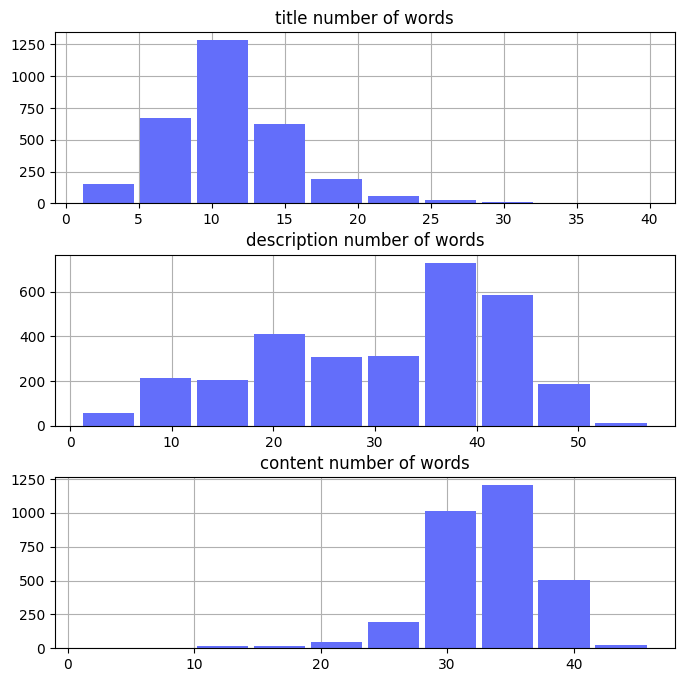

In [9]:
get_hist(parsed, text_cols_word_count)

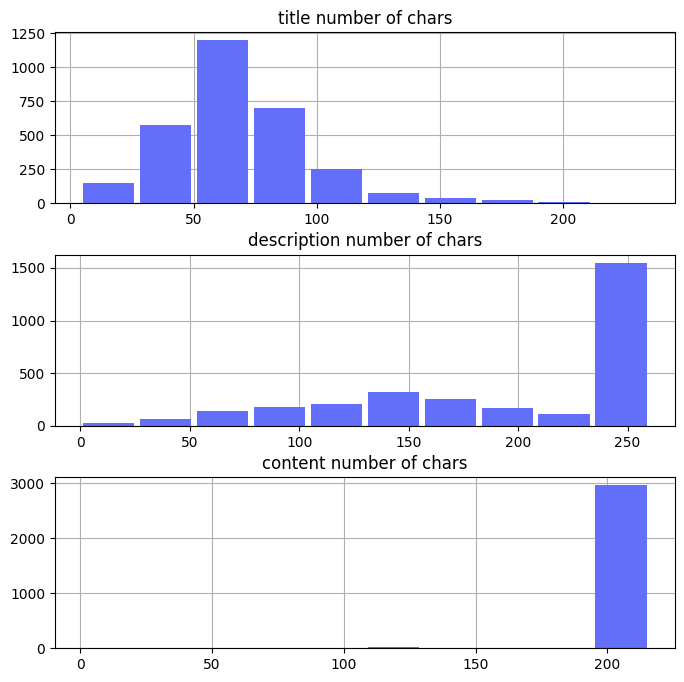

In [10]:
get_hist(parsed, text_cols_char_count)